# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [93]:
df_account = pd.read_csv("./processed/account.csv", sep=";");
df_card_comp = pd.read_csv("./processed/card_comp.csv", sep=";");
df_card_dev = pd.read_csv("./processed/card_dev.csv", sep=";");
df_client = pd.read_csv("./processed/client.csv", sep=";");
df_disp = pd.read_csv("./processed/disp.csv", sep=";");
df_loan_comp = pd.read_csv("./processed/loan_comp.csv", sep=";");
df_loan_dev = pd.read_csv("./processed/loan_dev.csv", sep=";");
df_loan_dev_original = pd.read_csv("./processed/loan_dev.csv", sep=";");
# df_trans_comp = pd.read_csv("./processed/trans_dev.csv", sep=";");
df_trans_dev = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False); # see here
df_district = pd.read_csv("./raw/district.csv", sep=";");

df_loan_dev['date'] = [datetime.strptime(d, "%Y-%m-%d") for d in df_loan_dev['date']]

In [3]:
df_account.columns

Index(['account_id', 'district_id', 'frequency', 'date'], dtype='object')

account.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| account_id    | Numerical   | Low                     |
| district_id   | Numerical   | Low                     |
| frequency     | Categorical | Medium                  |
| date          | Numerical(date)| Low                  |

In [4]:
df_card_dev.columns

Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')

card_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| card_id       | Numerical   | Low                     |
| disp_id       | Numerical   | Medium (meaning???)     |
| type          | Categorical | High                    |
| issued        | Numerical(date)| Low                  |

In [5]:
df_client.columns

Index(['client_id', 'district_id', 'birthdate', 'sex'], dtype='object')

client.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| client_id     | Numerical   | Low                     |
| district_id   | Numerical   | Medium (?)              |
| birthdate     | Numerical   | Low                     |
| sex           | Categorical | Medium                  |

In [6]:
df_disp.columns

Index(['disp_id', 'client_id', 'account_id', 'type'], dtype='object')

disp.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| disp_id       | Numerical   | Low                     |
| client_id     | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| type          | Categorical | Medium                  |

In [7]:
df_loan_dev.columns #duration in months

Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')

loan_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| loan_id       | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| date          | Numerical   | Medium                  |
| amount        | Numerical   | High                    |
| duration      | Numerical   | High                    |
| payment       | Numerical   | Medium                  |
| status        | Numerical   | High|

In [8]:
df_trans_dev.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

trans_dev.csv Variables

| Variable Name | Type        | Expectation (influence) |
| ---           | ---         | ---                     |
| trans_id      | Numerical   | Low                     |
| account_id    | Numerical   | Low                     |
| date          | Numerical   | Low                     |
| type          | Numerical   | Medium                  |
| operation     | Numerical   | Medium                  |
| amount        | Numerical   | Medium/High             |
| balance       | Numerical   | Medium/High             |
| k_symbol      | Numerical   | Medium                  |
| bank          | Categorical | Medium                  |
| account       | Numerical   | Low                     |

In [9]:
df_district.columns

Index(['code ', 'name ', 'region', 'no. of inhabitants',
       'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')

district.csv Variables

| Variable Name             | Type        | Expectation (influence)        |
| ---                       | ---         | ---                            |
| code                      | Numerical   | Low                            |
| name                      | Categorical | Low                            |
| region                    | Categorical | Low                            |
| no. of inhabitants        | Numerical   | Medium                         |
| inhabitants < 499         | Numerical   | Low                            |
| munic with # inhabitants 500-1999      | Numerical   | Low               |
| inhabitants 2000-9999     | Numerical   | Low                            |
| inhabitants >10000        | Numerical   | Low                            |
| no. of cities             | Numerical   | Low                            |
| ratio of urban inhabitants| Numerical   | Medium                         |
| average salary            | Numerical   | High                           |
| unemploymant rate '95     | Numerical   | High                           |
| unemploymant rate '96     | Numerical   | High                           |
| enterpreneurs per 1000 inhabitants    | Numerical   | Medium/High        |
| commited crimes '95       | Numerical   | High                           |
| commited crimes '96       | Numerical   | High                           |

### Relevant Variables
- Account:     frequency (of issuance)
- Card:        disp_id(?), type
- Client:      district_id(?), sex
- Disp:        type
- Loan:        date, amount, duration, payment, status
- Transaction: type, operation, amount, balance, k_symbol, bank
- district: #inhabitants, ratio of urban inhabitants, avg salary, unemp rate 95', 96', entrepreneurs per 1000 inhabitants, commited crimes '95, '96

#### Account

In [10]:
# descriptive statistics summary
df_account['frequency'].describe()

count                 4500
unique                   3
top       monthly issuance
freq                  4167
Name: frequency, dtype: object

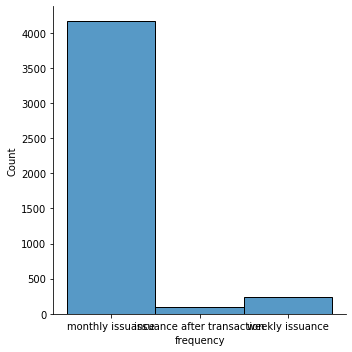

In [11]:
# histogram
sns.displot(df_account['frequency'])

In [12]:
# missing data
total = df_account.isnull().sum().sort_values(ascending=False)
percent = (df_account.isnull().sum()/df_account.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
account_id,0,0.0
district_id,0,0.0
frequency,0,0.0
date,0,0.0


#### Card

In [13]:
# descriptive statistics summary
df_card_dev['disp_id'].describe()

count      177.000000
mean      3031.723164
std       2632.338944
min         41.000000
25%       1080.000000
50%       2513.000000
75%       4270.000000
max      13660.000000
Name: disp_id, dtype: float64

In [14]:
# descriptive statistics summary
df_card_dev['type'].describe()

count         177
unique          3
top       classic
freq          127
Name: type, dtype: object

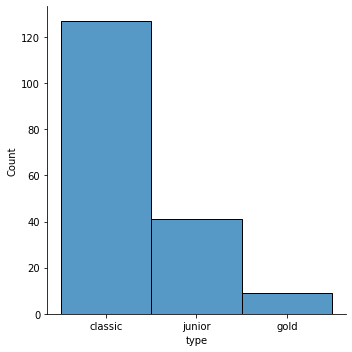

In [15]:
# histogram
sns.displot(df_card_dev['type'])

In [16]:
# missing data
total = df_card_dev.isnull().sum().sort_values(ascending=False)
percent = (df_card_dev.isnull().sum()/df_card_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
card_id,0,0.0
disp_id,0,0.0
type,0,0.0
issued,0,0.0


#### Client

In [17]:
# descriptive statistics summary
df_client['district_id'].describe()

count    5369.000000
mean       37.310114
std        25.043690
min         1.000000
25%        14.000000
50%        38.000000
75%        60.000000
max        77.000000
Name: district_id, dtype: float64

In [18]:
df_client['sex'].describe()

count     5369
unique       2
top          M
freq      2724
Name: sex, dtype: object

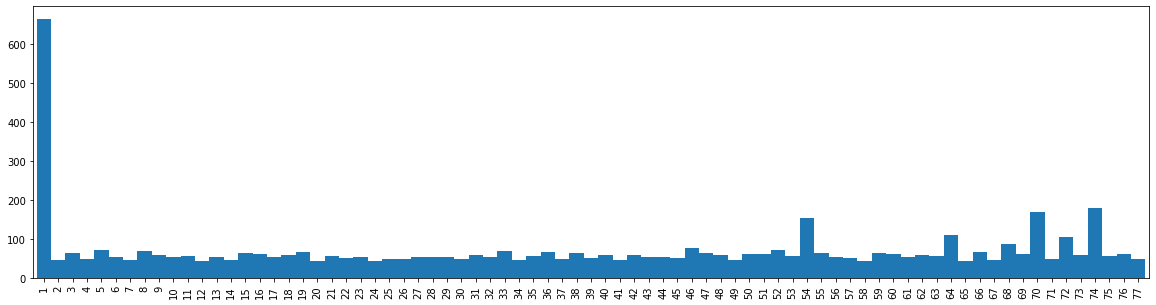

In [19]:
# histogram
# Change to full bars
#sns.displot(df_client['district_id'])
df_client['district_id'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(20, 5))

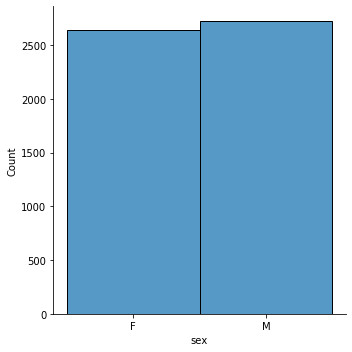

In [20]:
# histogram
sns.displot(df_client['sex'])

In [21]:
# missing data
total = df_client.isnull().sum().sort_values(ascending=False)
percent = (df_client.isnull().sum()/df_client.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
client_id,0,0.0
district_id,0,0.0
birthdate,0,0.0
sex,0,0.0


#### Disp

In [22]:
# descriptive statistics summary
df_disp['type'].describe()

count      5369
unique        2
top       OWNER
freq       4500
Name: type, dtype: object

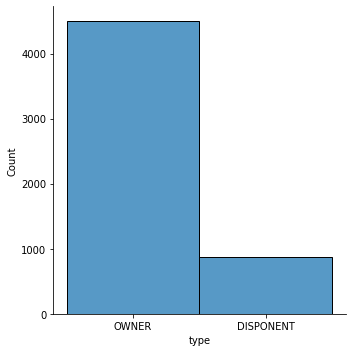

In [23]:
# histogram
sns.displot(df_disp['type'])

In [24]:
# missing data
total = df_disp.isnull().sum().sort_values(ascending=False)
percent = (df_disp.isnull().sum()/df_disp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
disp_id,0,0.0
client_id,0,0.0
account_id,0,0.0
type,0,0.0


#### Loan

In [25]:
# descriptive statistics summary
df_loan_dev['date'].describe(datetime_is_numeric=True)

count                              328
mean     1995-06-21 08:02:55.609756160
min                1993-07-05 00:00:00
25%                1994-08-09 06:00:00
50%                1995-05-31 00:00:00
75%                1996-05-25 06:00:00
max                1996-12-27 00:00:00
Name: date, dtype: object

In [26]:
df_loan_dev['amount'].describe()

count       328.000000
mean     145308.621951
std      105247.318098
min        4980.000000
25%       68328.000000
50%      114804.000000
75%      198600.000000
max      538500.000000
Name: amount, dtype: float64

In [27]:
df_loan_dev['duration'].describe()

count    328.000000
mean      35.853659
std       16.734752
min       12.000000
25%       24.000000
50%       36.000000
75%       48.000000
max       60.000000
Name: duration, dtype: float64

In [28]:
df_loan_dev['payments'].describe()

count     328.000000
mean     4150.932927
std      2193.620989
min       319.000000
25%      2368.750000
50%      3878.500000
75%      5907.750000
max      9689.000000
Name: payments, dtype: float64

In [29]:
df_loan_dev['status'].describe()

count    328.000000
mean       0.719512
std        0.695541
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

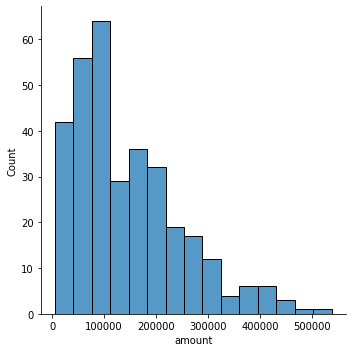

In [30]:
# histogram
sns.displot(df_loan_dev['amount'])

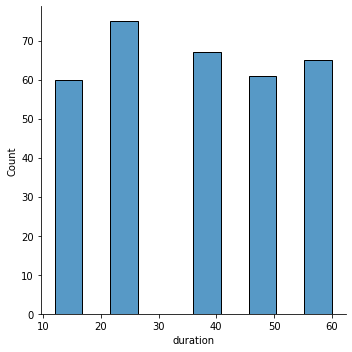

In [31]:
# histogram
sns.displot(df_loan_dev['duration'])

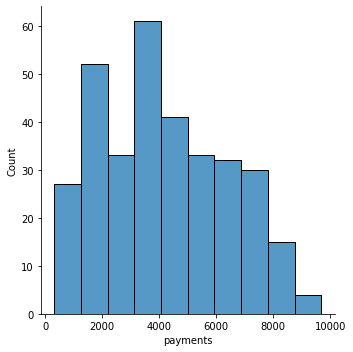

In [32]:
# histogram
sns.displot(df_loan_dev['payments'])

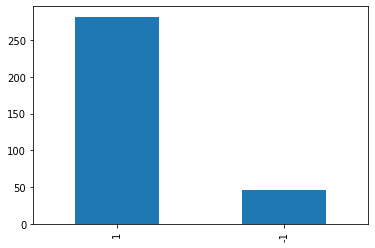

In [33]:
# histogram
#sns.displot(df_loan_dev['status'])
df_loan_dev['status'].value_counts().plot(kind='bar')

In [34]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['amount'].skew())
print("Kurtosis: %f" % df_loan_dev['amount'].kurt())

Skewness: 1.081108
Kurtosis: 0.830694


In [35]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['duration'].skew())
print("Kurtosis: %f" % df_loan_dev['duration'].kurt())

Skewness: 0.055892
Kurtosis: -1.267191


In [36]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['payments'].skew())
print("Kurtosis: %f" % df_loan_dev['payments'].kurt())

Skewness: 0.269339
Kurtosis: -0.846561


In [37]:
# skewness and kurtosis
# skewness: [-0.5, 0.5] -> symmetrical, [-1,-0.5]/[0.5,1] -> moderately skewed, [-inf, -1]/[1, +inf] highly skewed
# kurtosis:
#  > 3 -> dataset has heavier tails than a normal distribution (more in the tails);
#  < 3 -> dataset has lighter tails than a normal distribution (less in the tails)
print("Skewness: %f" % df_loan_dev['status'].skew())
print("Kurtosis: %f" % df_loan_dev['status'].kurt())

Skewness: -2.081621
Kurtosis: 2.347424


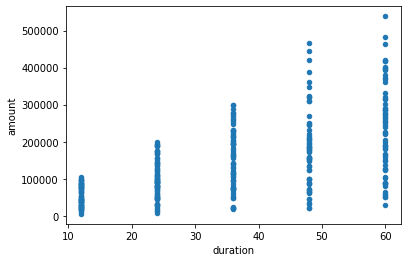

In [38]:
#scatter plot duration/amount
var = 'duration'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

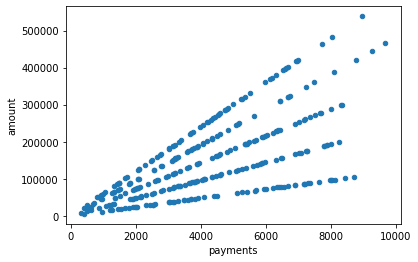

In [39]:
#scatter plot payments/amount
var = 'payments'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

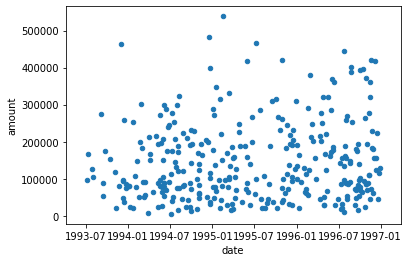

In [40]:
#scatter plot date/amount
var = 'date'
data = pd.concat([df_loan_dev['amount'], df_loan_dev[var]], axis=1)
data.plot.scatter(x=var, y='amount');

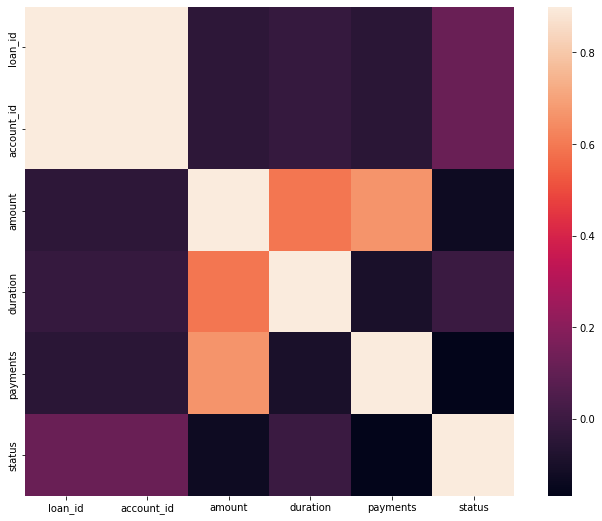

In [41]:
#correlation matrix
corrmat = df_loan_dev.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

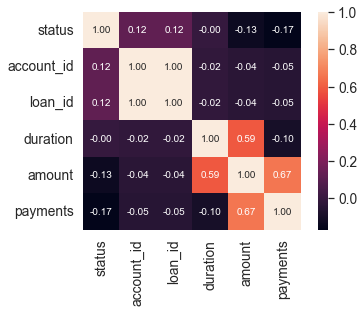

In [42]:
# status correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'status')['status'].index
cm = np.corrcoef(df_loan_dev[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [43]:
# missing data
total = df_loan_dev.isnull().sum().sort_values(ascending=False)
percent = (df_loan_dev.isnull().sum()/df_loan_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
loan_id,0,0.0
account_id,0,0.0
date,0,0.0
amount,0,0.0
duration,0,0.0
payments,0,0.0
status,0,0.0


#### Transaction

In [44]:
# descriptive statistics
# trans_id;account_id;date;type;operation;amount;balance;k_symbol;bank;account
df_trans_dev['trans_id'].count()

396685

In [45]:
# descriptive statistics summary
df_trans_dev['type'].describe()

count         396685
unique             3
top       withdrawal
freq          232093
Name: type, dtype: object

In [46]:
# descriptive statistics summary
df_trans_dev['operation'].describe()

count                 325924
unique                     5
top       withdrawal in cash
freq                  165270
Name: operation, dtype: object

In [47]:
# descriptive statistics summary
df_trans_dev['amount'].describe()

count    396685.000000
mean       5677.552980
std        9190.364137
min           0.000000
25%         127.500000
50%        1952.000000
75%        6500.000000
max       86400.000000
Name: amount, dtype: float64

In [48]:
# descriptive statistics summary
df_trans_dev['k_symbol'].describe()

count                211441
unique                    7
top       interest credited
freq                  70761
Name: k_symbol, dtype: object

In [49]:
# descriptive statistics summary
df_trans_dev['bank'].describe()

count     97242
unique       13
top          ST
freq       8114
Name: bank, dtype: object

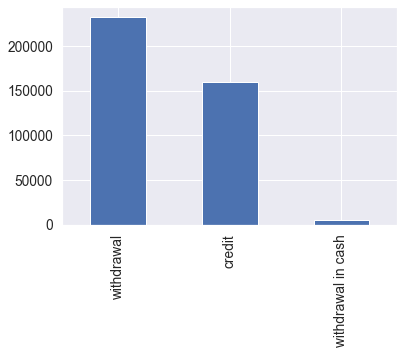

In [50]:
# histogram
df_trans_dev['type'].value_counts().plot(kind='bar')

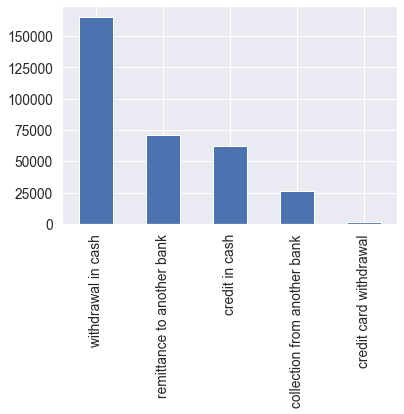

In [51]:
# histogram
df_trans_dev['operation'].value_counts().plot(kind='bar')

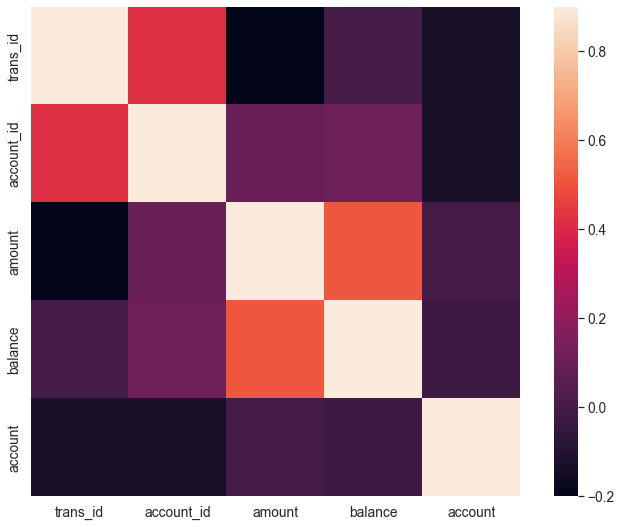

In [52]:
#correlation matrix
corrmat = df_trans_dev.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

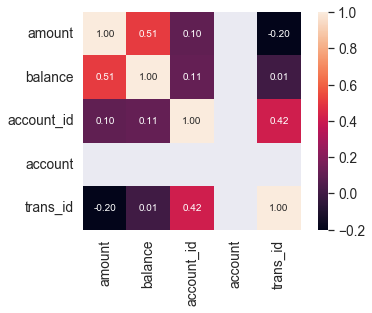

In [53]:
# amount correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'amount')['amount'].index
cm = np.corrcoef(df_trans_dev[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [54]:
# missing data
total = df_trans_dev.isnull().sum().sort_values(ascending=False)
percent = (df_trans_dev.isnull().sum()/df_trans_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bank,299443,0.754863
account,294456,0.742292
k_symbol,185244,0.466980
operation,70761,0.178381
trans_id,0,0.000000
account_id,0,0.000000
date,0,0.000000
type,0,0.000000
amount,0,0.000000
balance,0,0.000000


## Merging account and loan dev datasets

In [55]:
print("Accounts:")
print(df_account.columns)
print("Shape: {}".format(df_account.shape))
print("\nLoans:")
print(df_loan_dev.columns)
print("Shape: {}".format(df_loan_dev.shape))
print("Unique Account IDs: {}".format(df_loan_dev.account_id.nunique()))

Accounts:
Index(['account_id', 'district_id', 'frequency', 'date'], dtype='object')
Shape: (4500, 4)

Loans:
Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')
Shape: (328, 7)
Unique Account IDs: 328


In [56]:
df_account = df_account.rename(columns={"date": "date_of_creation"})
df_account['date_of_creation'] = pd.to_datetime(df_account['date_of_creation'])

In [57]:
df_account.columns

Index(['account_id', 'district_id', 'frequency', 'date_of_creation'], dtype='object')

In [58]:
account_loan = pd.merge(df_account, df_loan_dev)
account_loan.columns

Index(['account_id', 'district_id', 'frequency', 'date_of_creation', 'loan_id',
       'date', 'amount', 'duration', 'payments', 'status'],
      dtype='object')

In [59]:
account_loan.head()

,account_id,district_id,frequency,date_of_creation,loan_id,date,amount,duration,payments,status
0,5270,44,monthly issuance,1993-01-13,6077,1993-11-22,79608,24,3317,1
1,11265,15,monthly issuance,1993-01-14,7284,1993-09-15,52788,12,4399,1
2,10364,55,monthly issuance,1993-01-17,7121,1993-11-10,21924,36,609,1
3,3834,54,monthly issuance,1993-01-19,5754,1994-09-28,23052,12,1921,1
4,9307,68,monthly issuance,1993-01-24,6895,1994-09-19,41904,12,3492,1


In [60]:
account_loan.shape

(328, 10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


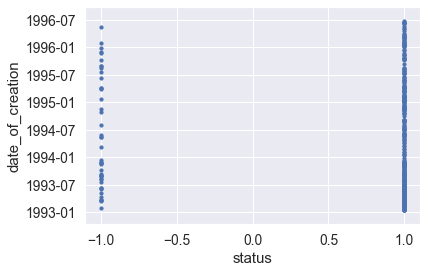

In [61]:
# Scatter plot here? :|
account_loan.plot.scatter(x = 'status', y = 'date_of_creation', s = 10);

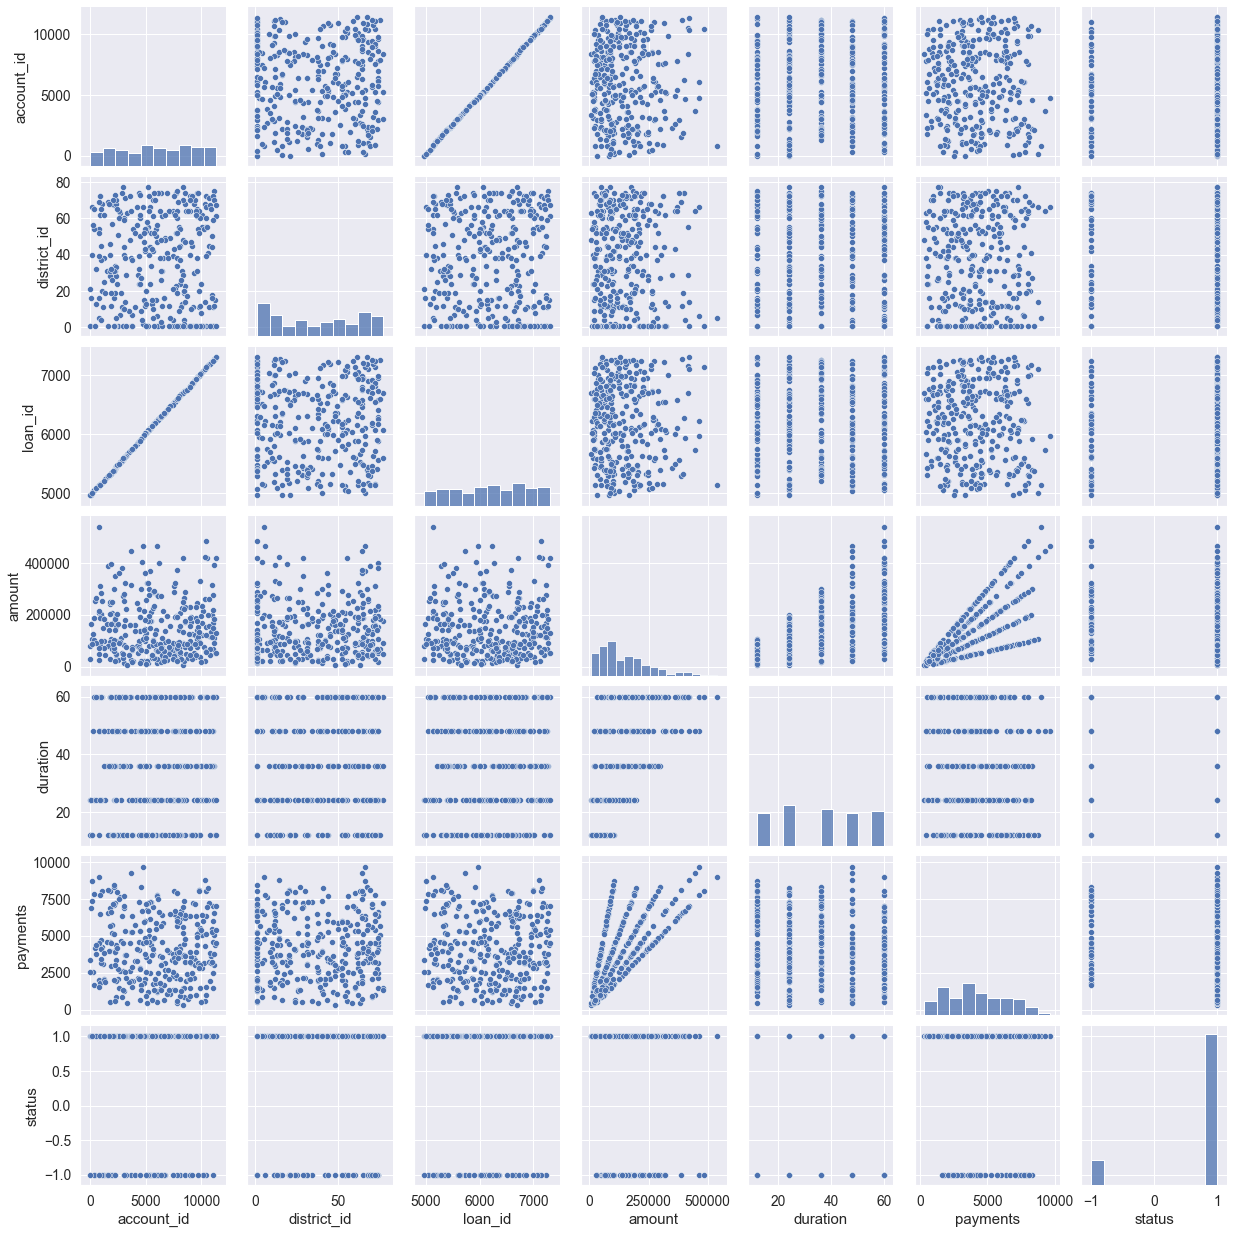

In [62]:
sns.pairplot(account_loan)

In [63]:
correlations_data = account_loan.corr()['status'].sort_values(ascending=False)
print(correlations_data)

status         1.000000
account_id     0.122633
loan_id        0.121917
district_id   -0.001332
duration      -0.003537
amount        -0.128237
payments      -0.168436
Name: status, dtype: float64


## Merge account loan with districts

In [64]:
df_district = pd.read_csv("./raw/district.csv", sep=";");

In [65]:
df_district = df_district.drop(columns=['no. of cities '])
df_district = df_district.rename(columns={"code ": "district_id"})

In [66]:
print("Districts:")
print(df_district.columns)
print("Shape: {}".format(df_district.shape))

print("Account Loan:")
print(account_loan.columns)
print("Shape: {}".format(account_loan.shape))

Districts:
Index(['district_id', 'name ', 'region', 'no. of inhabitants',
       'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')
Shape: (77, 15)
Account Loan:
Index(['account_id', 'district_id', 'frequency', 'date_of_creation', 'loan_id',
       'date', 'amount', 'duration', 'payments', 'status'],
      dtype='object')
Shape: (328, 10)


In [67]:
account_loan_district = pd.merge(account_loan, df_district)
account_loan_district.columns

Index(['account_id', 'district_id', 'frequency', 'date_of_creation', 'loan_id',
       'date', 'amount', 'duration', 'payments', 'status', 'name ', 'region',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')

In [68]:
account_loan_district.head()

,account_id,district_id,frequency,date_of_creation,loan_id,date,amount,duration,payments,status,...,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,5270,44,monthly issuance,1993-01-13,6077,1993-11-22,79608,24,3317,1,...,26,7,2,53.0,8254,2.79,3.76,97,2166,2325
1,5385,44,weekly issuance,1993-05-21,6103,1994-04-07,149340,60,2489,1,...,26,7,2,53.0,8254,2.79,3.76,97,2166,2325
2,8027,44,weekly issuance,1993-07-07,6642,1994-06-05,77640,12,6470,1,...,26,7,2,53.0,8254,2.79,3.76,97,2166,2325
3,3037,44,monthly issuance,1994-05-26,5593,1996-04-18,277884,36,7719,-1,...,26,7,2,53.0,8254,2.79,3.76,97,2166,2325
4,10942,44,weekly issuance,1994-06-05,7227,1995-10-02,314520,60,5242,1,...,26,7,2,53.0,8254,2.79,3.76,97,2166,2325


## Merge loan with transactions

In [69]:
print("Loans:")
print(df_loan_dev.columns)
print("Shape: {}".format(df_loan_dev.shape))

print("\nTransactions:")
print(df_trans_dev.columns)
print("Shape: {}".format(df_trans_dev.shape))

Loans:
Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')
Shape: (328, 7)

Transactions:
Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')
Shape: (396685, 10)


In [81]:
df_loan_dev = df_loan_dev.rename(columns={"date": "loan_date", "amount": "loan_amount"})
df_trans_dev = df_trans_dev.rename(columns={"date": "transaction_date", "amount": "trans_amount"})

In [82]:
df_loan_dev.head()

,loan_id,account_id,loan_date,loan_amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1


In [83]:
df_trans_dev.head()

,trans_id,account_id,transaction_date,type,operation,trans_amount,balance,k_symbol,bank,account
0,1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [84]:
df_trans_dev_min = df_trans_dev.drop(columns=['k_symbol', 'bank', 'account'])
df_trans_dev_min.head()

,trans_id,account_id,transaction_date,type,operation,trans_amount,balance
0,1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0
1,1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0
2,3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0
3,3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0
4,1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0


In [88]:
print(df_loan_dev.dtypes)
print(df_trans_dev_min.dtypes)

loan_id                 int64
account_id              int64
loan_date      datetime64[ns]
loan_amount             int64
duration                int64
payments                int64
status                  int64
dtype: object
trans_id              int64
account_id            int64
transaction_date     object
type                 object
operation            object
trans_amount        float64
balance             float64
dtype: object


In [90]:
loan_transactions = pd.merge(df_loan_dev, df_trans_dev_min)
loan_transactions.head()

,loan_id,account_id,loan_date,loan_amount,duration,payments,status,trans_id,transaction_date,type,operation,trans_amount,balance
0,5314,1787,1993-07-05,96396,12,8033,-1,523621,1993-03-22,credit,credit in cash,1100.0,1100.0
1,5314,1787,1993-07-05,96396,12,8033,-1,524054,1993-04-21,credit,credit in cash,9900.0,11000.0
2,5314,1787,1993-07-05,96396,12,8033,-1,524055,1993-05-21,credit,credit in cash,5800.0,16800.0
3,5314,1787,1993-07-05,96396,12,8033,-1,524056,1993-06-20,credit,credit in cash,3300.0,20100.0
4,5316,1801,1993-07-11,165960,36,4610,1,527445,1993-02-13,credit,credit in cash,700.0,700.0


In [91]:
loan_transactions.shape

(24494, 13)

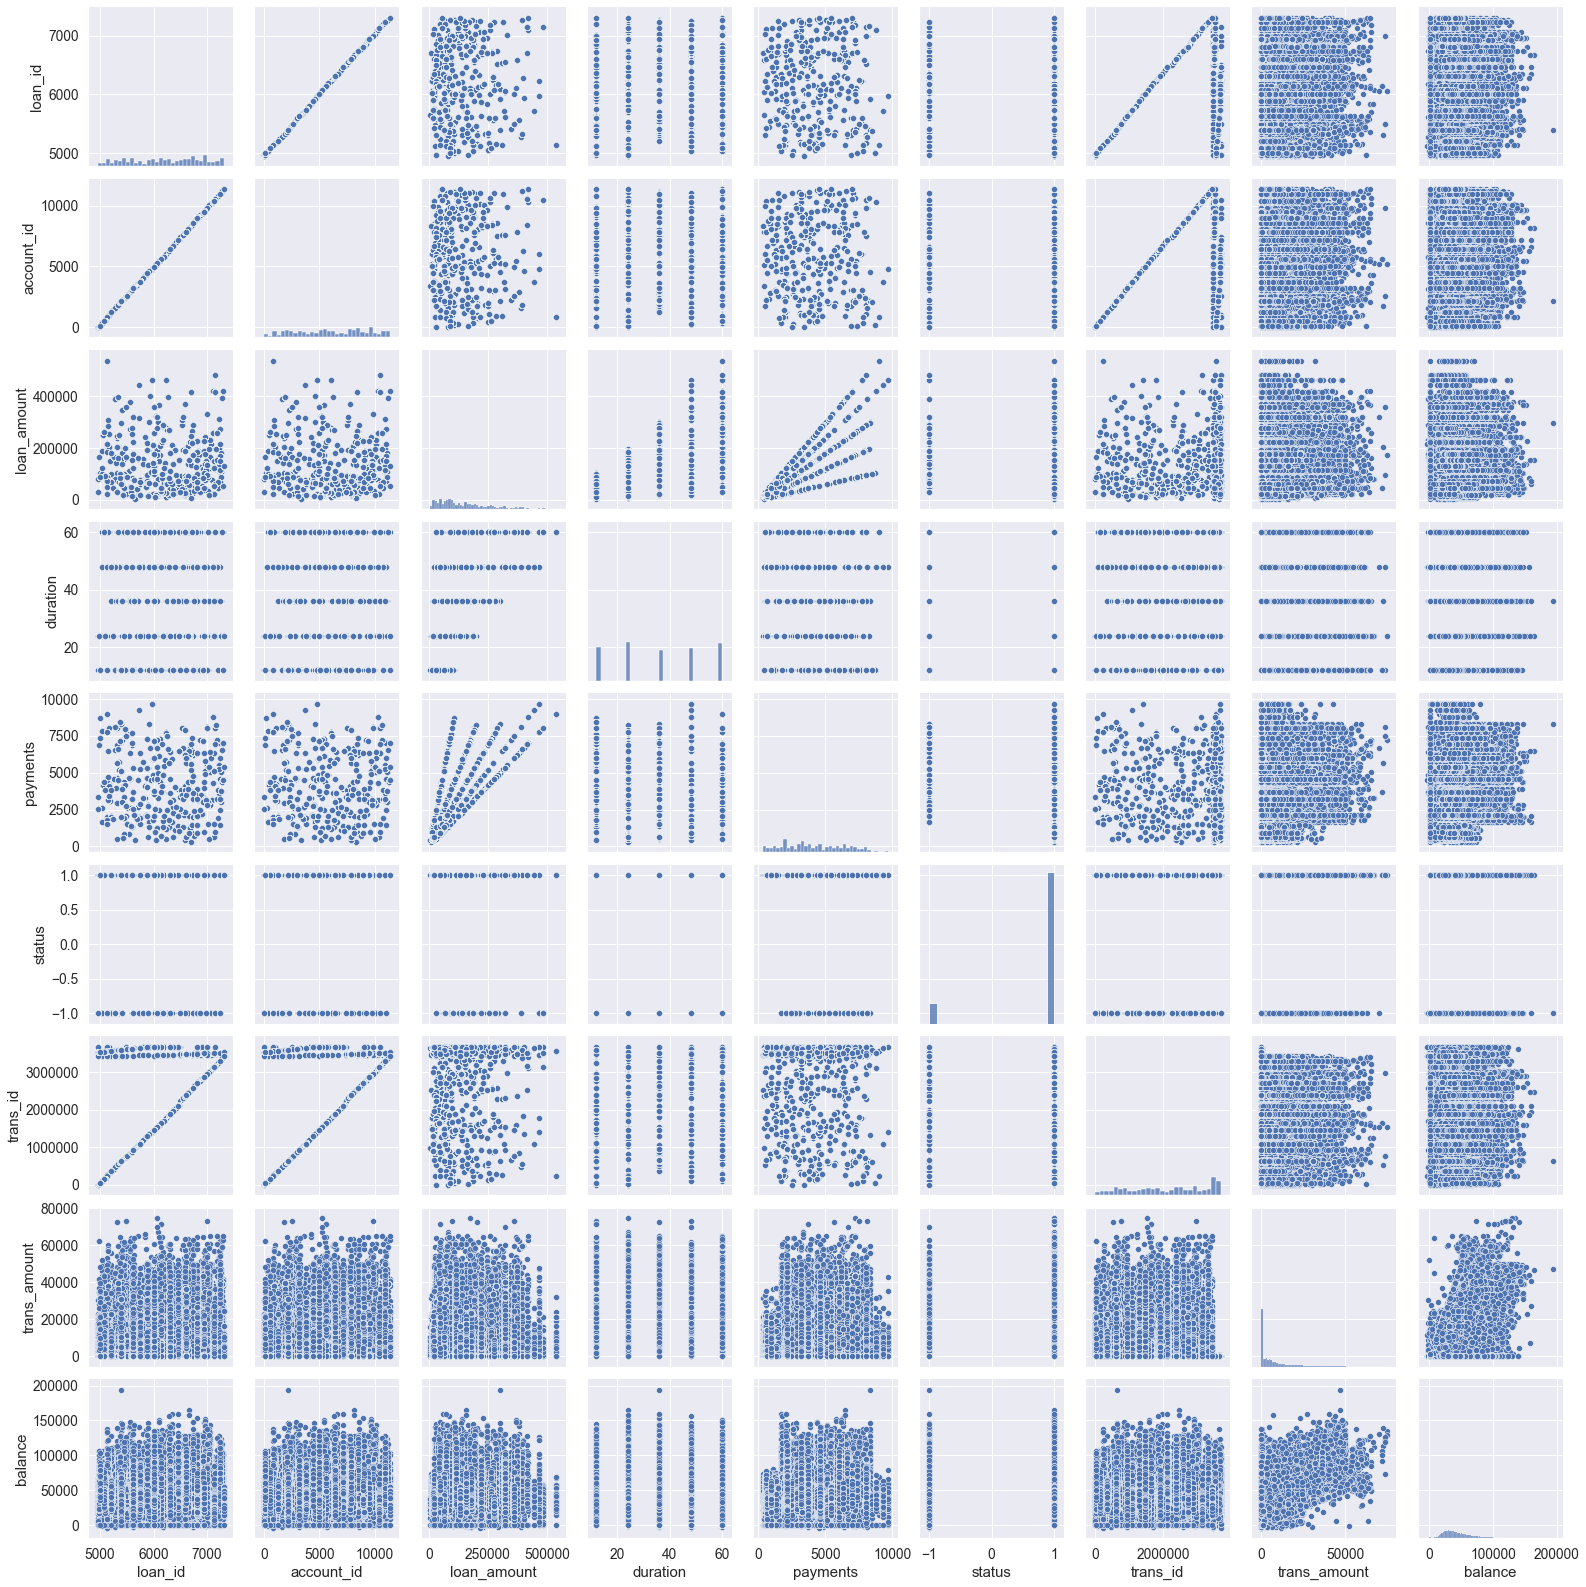

In [92]:
sns.pairplot(loan_transactions)

In [96]:
df_loan_dev_original.dtypes

loan_id        int64
account_id     int64
date          object
amount         int64
duration       int64
payments       int64
status         int64
dtype: object

In [103]:
# df_loan_dev_original['new_status'] = (df_loan_dev_original['status'] == -1).astype(int)

In [105]:
# df_loan_dev_original.to_csv("./processed/normalized_status.csv", sep=";")